In [81]:
%pylab inline

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

from soln.dataset import AllCategoricalsFeaturizer
from soln.dataset import generate_xv_splits
from soln.dataset import get_augmented_train_and_test_set
from soln.utils import dump_decision_tree
from soln.utils import eval_regressor
from soln.utils import print_feature_importances

Populating the interactive namespace from numpy and matplotlib


In [82]:
%time aug_train_set, aug_test_set = get_augmented_train_and_test_set()
%time X_train, y_train, X_test, y_test = next(generate_xv_splits(aug_train_set))

CPU times: user 6.59 s, sys: 20 ms, total: 6.61 s
Wall time: 6.7 s
CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 54.1 ms


In [61]:
featurizer = AllCategoricalsFeaturizer()
%time featurizer.fit(X_train)
%time X_train_feats = featurizer.transform(X_train)
%time X_test_feats = featurizer.transform(X_test)
X_train_feats.info(verbose=True)

%time X_train_np = X_train_feats.astype(np.float).values
y_train_np = y_train.values
%time X_test_np = X_test_feats.astype(np.float).values
y_test_np = y_test.values

CPU times: user 476 ms, sys: 0 ns, total: 476 ms
Wall time: 486 ms
CPU times: user 728 ms, sys: 200 ms, total: 928 ms
Wall time: 937 ms
CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 104 ms
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27270 entries, 0 to 27269
Data columns (total 460 columns):
annual_usage                                           int64
min_order_quantity                                     int64
bracket_pricing                                        bool
quantity                                               int64
diameter                                               float64
wall_thickness                                         float64
length                                                 float64
num_bends                                              int64
bend_radius                                            float64
end_a_1x                                               bool
end_a_2x                                               bool
end_x_1x     

In [62]:
regressors = [
    DummyRegressor(strategy='constant', constant=0.0),
    DummyRegressor(strategy='mean'),
    RandomForestRegressor(n_estimators=20),
    # RandomForestRegressor(n_estimators=100),
]

for reg in regressors:
    %time train_rmsle, test_rmsle = eval_regressor(reg, X_train_np, y_train_np, X_test_np, y_test_np)
    print "{}:".format(reg)
    print "    train RMSLE {}".format(train_rmsle)
    print "    test RMSLE {}".format(test_rmsle)
    print

CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 39.1 ms
DummyRegressor(constant=array(0.0), quantile=None, strategy='constant'):
    train RMSLE 2.35096935718
    test RMSLE 2.33511433951

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 41.2 ms
DummyRegressor(constant=None, quantile=None, strategy='mean'):
    train RMSLE 0.823285253414
    test RMSLE 0.822800797077

CPU times: user 43 s, sys: 112 ms, total: 43.1 s
Wall time: 43.3 s
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False):
    train RMSLE 0.0917631053117
    test RMSLE 0.282016842124



In [63]:
print_feature_importances(X_train_feats, reg);

adj_quantity 0.451671882978
diameter 0.120302716272
annual_usage 0.0699466891372
min_order_quantity 0.0527243842435
components other 0.0381164441673
quantity 0.036662751907
length 0.0355384842686
quote_age 0.0219725705376
end_a EF-003 0.0138944349016
bend_radius 0.011571466533
wall_thickness 0.0111385618898
supplier S-0041 0.00647451119576
end_x EF-003 0.00625627413632
supplier S-0054 0.00622503308881
num_bends 0.00612131309084
supplier S-0064 0.00594005132045
supplier S-0026 0.00581465542666
bracketing_pattern (1, 3, 5, 7, 9) 0.00491167266101
supplier S-0072 0.00387653587486
supplier S-0066 0.00383171274154
components C-0063 0.00312532892158
bracketing_pattern (5, 19, 20) 0.00269457386506
bracketing_pattern (1, 6, 20) 0.00251160805277
components C-1631 0.002379973962
bracketing_pattern other 0.00198289187902
material_id SP-0028 0.00190791946901
components C-1727 0.00179636893336
components C-1630 0.00171289081947
bracketing_pattern (1, 2, 5, 10, 25, 50, 100, 250) 0.00165307610117
end_

In [41]:
print_feature_importances(X_train_feats, reg.estimators_[0])

adj_quantity 0.383636015766
diameter 0.11265538548
quantity 0.102695954927
annual_usage 0.0695016293123
min_order_quantity 0.0562030720638
length 0.0381054124711
components other 0.0315695194441
quote_date_days_since_1900 0.0254373647876
end_a EF-003 0.0230288972112
supplier S-0054 0.0135606124729
bend_radius 0.0120611480668
num_bends 0.00732055109556
wall_thickness 0.00693447963585
bracketing (1, 3, 5, 7, 9) 0.00655966182841
supplier S-0026 0.00653500089742
supplier S-0041 0.00649436623324
end_x EF-003 0.00597924355396
supplier S-0066 0.00425901069624
bracketing other 0.00362096411591
supplier S-0072 0.00351878035727
end_a_2x 0.00322958809483
bracketing (1, 6, 20) 0.00272968076017
supplier S-0064 0.00271985531768
components C-1727 0.00266456998671
specs SP-0061 0.00201049974401
end_x EF-023 0.0019811121209
end_x_2x 0.0018908052284
bracketing (1, 2, 3, 4, 5) 0.00179992430602
components C-1629 0.00175922658999
bracketing (5, 19, 20) 0.00175655502861
components C-1445 0.00169516258566
ma

[('adj_quantity', 0.38363601576561601),
 ('diameter', 0.11265538548010036),
 ('quantity', 0.10269595492660942),
 ('annual_usage', 0.06950162931234817),
 ('min_order_quantity', 0.056203072063815751),
 ('length', 0.03810541247114544),
 ('components other', 0.031569519444086327),
 ('quote_date_days_since_1900', 0.02543736478764887),
 ('end_a EF-003', 0.0230288972111805),
 ('supplier S-0054', 0.013560612472883808),
 ('bend_radius', 0.01206114806682235),
 ('num_bends', 0.0073205510955589494),
 ('wall_thickness', 0.0069344796358468477),
 ('bracketing (1, 3, 5, 7, 9)', 0.0065596618284128761),
 ('supplier S-0026', 0.0065350008974187574),
 ('supplier S-0041', 0.0064943662332401595),
 ('end_x EF-003', 0.0059792435539641866),
 ('supplier S-0066', 0.004259010696238426),
 ('bracketing other', 0.0036209641159054905),
 ('supplier S-0072', 0.0035187803572677184),
 ('end_a_2x', 0.0032295880948316454),
 ('bracketing (1, 6, 20)', 0.0027296807601701685),
 ('supplier S-0064', 0.0027198553176849168),
 ('com

In [42]:
dump_decision_tree("tree0.pdf", X_train_feats, reg.estimators_[0], max_depth=5)

(27270,)

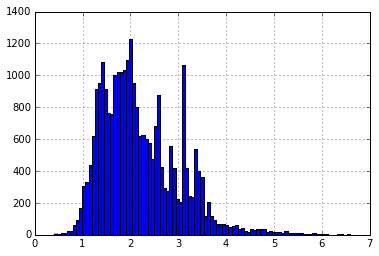

In [64]:
y_train.hist(bins=100)
y_train.shape

(27270,)

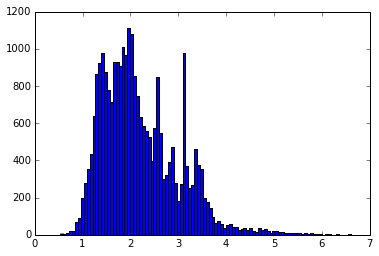

In [65]:
y_train_pred = reg.predict(X_train_np)
hist(y_train_pred, bins=100)
y_train_pred.shape

(2943,)

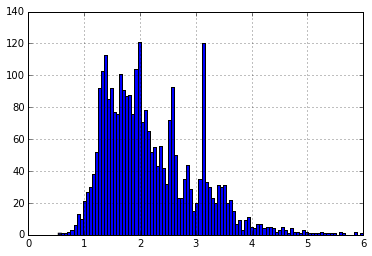

In [66]:
y_test.hist(bins=100)
y_test.shape

(2943,)

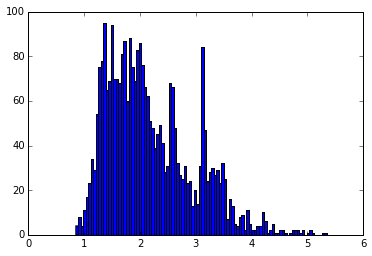

In [67]:
y_test_pred = reg.predict(X_test_np)
hist(y_test_pred, bins=100);
y_test_pred.shape

In [122]:
df = X_test.copy()
df['log_cost'] = y_test
df['pred_log_cost'] = y_test_pred
df['err2'] = (df['log_cost'] - df['pred_log_cost']) ** 2
df[7:15]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,log_cost,pred_log_cost,err2
7,TA-00093,S-0066,2013-06-01,0,0,True,1,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",3.117823,3.117429,1.552754e-07
8,TA-00093,S-0066,2013-06-01,0,0,True,2,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,2,True,"(1, 2, 5, 10, 25, 50, 100, 250)",2.567439,2.567596,2.467026e-08
9,TA-00093,S-0066,2013-06-01,0,0,True,5,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,5,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.986917,1.984847,4.286038e-06
10,TA-00093,S-0066,2013-06-01,0,0,True,10,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,10,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.682495,1.679511,8.904909e-06
11,TA-00093,S-0066,2013-06-01,0,0,True,25,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,25,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.442853,1.439277,1.278186e-05
12,TA-00093,S-0066,2013-06-01,0,0,True,50,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,50,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.364968,1.361431,1.250912e-05
13,TA-00093,S-0066,2013-06-01,0,0,True,100,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,100,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.328059,1.322067,3.590655e-05
14,TA-00093,S-0066,2013-06-01,0,0,True,250,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,250,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.305695,1.304968,5.279536e-07


In [43]:
taids = ['TA-00084', 'TA-00093', 'TA-04118', 'TA-04375', 'TA-20290']
pd.set_option('display.max_columns', None)
aug_train_set[aug_train_set.tube_assembly_id.isin(taids) & (aug_train_set.quantity == 1)]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,log_cost,material_id,diameter,wall_thickness,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,dev_fold
160,TA-00084,S-0066,2013-08-11,0,0,True,1,3.117823,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41495,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",5
209,TA-00093,S-0066,2013-06-01,0,0,True,1,3.117823,SP-0039,6.35,0.71,132,4,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41424,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",0
7181,TA-04118,S-0066,2013-06-01,0,0,True,1,3.117823,SP-0028,9.52,0.89,56,3,19.05,False,False,False,False,EF-003,EF-003,0,0,0,"[SP-0007, SP-0024, SP-0026, SP-0069, SP-0080, ...","[C-1621, C-1621, C-1628, C-1628]",41424,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1
7730,TA-04375,S-0066,2014-02-01,1,0,True,1,3.117823,SP-0029,19.05,2.11,130,4,50.80,False,False,False,False,NONE,EF-003,0,0,0,[],"[C-1624, C-1631]",41669,1,True,"(1, 2, 5, 10, 25, 50, 100)",6
27791,TA-20290,S-0066,2013-07-21,0,0,True,1,3.117823,SP-0019,6.35,0.71,116,6,19.05,False,False,False,False,EF-008,EF-008,0,0,0,[],"[C-1312, C-1312]",41474,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1


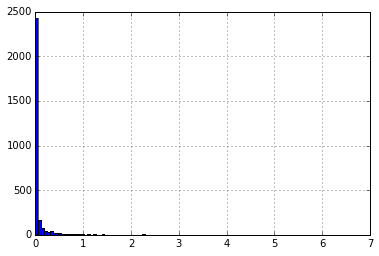

In [90]:
df.err2.hist(bins=100)

In [123]:
df['orig_index'] = df.index
df.sort('err2', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df['cum_err2'] = df.err2.cumsum()
df['cum_err2_frac'] = df.cum_err2 / df.err2.sum()
df[:5]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,log_cost,pred_log_cost,err2,orig_index,cum_err2,cum_err2_frac
0,TA-12043,S-0058,2014-08-20,1,50,False,1,SP-0029,9.52,0.89,55,3,31.75,False,False,False,False,EF-003,EF-003,0,0,0,"[SP-0007, SP-0012, SP-0024, SP-0026, SP-0080, ...","[C-1621, C-1621, C-1628, C-1628]",41869,50,False,(),3.964544,1.508582,6.031747,1836,6.031747,0.025769
1,TA-05245,S-0090,2005-02-23,0,1,True,1,SP-0035,19.05,1.24,25,1,44.45,False,False,False,False,EF-003,EF-017,0,0,0,[],"[C-0443, C-1486]",38404,1,False,(),0.909402,3.057529,4.614448,1024,10.646195,0.045484
2,TA-01630,S-0072,2013-04-30,5,1,True,1,SP-0035,12.70,1.65,66,4,38.10,False,False,False,False,EF-018,EF-018,0,0,0,[],"[C-0448, C-0448, C-0449, C-0449]",41392,1,False,(),0.800605,2.596843,3.226470,298,13.872665,0.059268
3,TA-20766,S-0066,2013-11-02,1,0,True,250,SP-0029,12.70,0.89,34,3,25.40,False,False,False,True,EF-017,EF-003,0,0,0,[],"[C-1475, C-1476]",41578,250,True,"(1, 2, 5, 10, 25, 50, 100, 250)",2.979539,1.185228,3.219551,2853,17.092216,0.073023
4,TA-20766,S-0066,2013-11-02,1,0,True,100,SP-0029,12.70,0.89,34,3,25.40,False,False,False,True,EF-017,EF-003,0,0,0,[],"[C-1475, C-1476]",41578,100,True,"(1, 2, 5, 10, 25, 50, 100, 250)",2.985178,1.193087,3.211590,2852,20.303806,0.086744


0.92429426948043092

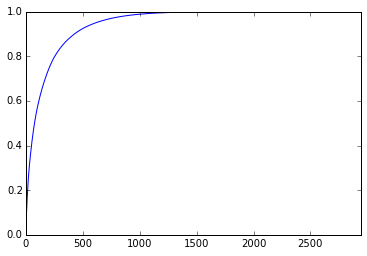

In [97]:
df.cum_err2_frac.plot()
df.cum_err2_frac[500]

In [99]:
500. / len(X_test)

0.16989466530750935

In [104]:
leaves = reg.apply(X_test_np)
print leaves.shape
leaves[:3, :]

(2943, 20)


array([[11852, 11175,  6808, 11443, 11766, 11186, 11463, 11363, 11621,
        11278, 12062, 11921, 11061, 11304, 11812, 11866, 11277, 10961,
        11139, 11297],
       [30515, 30383, 30573, 28863, 27159, 27289, 27696, 30797, 30418,
        28828, 28775, 30492, 30543, 30556, 27405, 30269, 27471, 27666,
        27768, 27291],
       [ 6300,  6467,  3794,  6338,  3901,  3763,  6504,  6492,  6256,
         6307,  6352,  6333,  6315,  6373,  6198,  6235,  6467,  6384,
         6206,  6165]])

In [111]:
tree0 = reg.estimators_[0]
tree0.tree_.value[11852]

array([[ 2.61841793]])

In [128]:
# An example with a good prediction:
sorted_index = 2000
taid = df.tube_assembly_id[sorted_index]
orig_index = df.orig_index[sorted_index]
print taid, orig_index
X = X_test_np[orig_index, :]
df[sorted_index:sorted_index+1]

TA-02848 533


,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,log_cost,pred_log_cost,err2,orig_index,cum_err2,cum_err2_frac
2000,TA-02848,S-0066,2013-06-16,0,0,True,1,SP-0029,12.7,2.11,194,3,38.1,False,False,False,False,EF-003,EF-003,0,0,0,[],"[C-1622, C-1622, C-1629, C-1629]",41439,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",3.185876,3.198435,0.000158,533,234.038015,0.999876


true value: 3.18587575272
predicted value:  3.19843466946
mean prediction: 3.19843466946
std prediction: 0.0525703175091
median prediction: 3.19090993474


[3.1402231616168312,
 3.1669501882068678,
 3.1669501882068678,
 3.1697593609672392,
 3.1730267862956474,
 3.1730267862956474,
 3.1730267862956474,
 3.1730267862956474,
 3.1730655913324717,
 3.1732015107511389,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.208618358723752,
 3.4088710144764689]

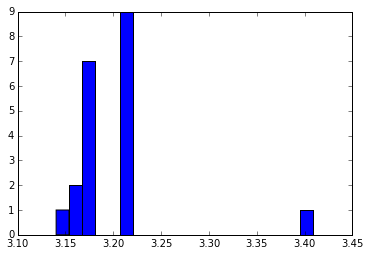

In [135]:
preds = [tree.predict([X])[0] for tree in reg.estimators_]
plt.hist(preds, bins=20)
print "true value:", df.log_cost[sorted_index]
print "predicted value: ", df.pred_log_cost[sorted_index]
print "mean prediction:", np.mean(preds)
print "std prediction:", np.std(preds)
print "median prediction:", np.median(preds)
list(sorted(preds))

In [199]:
# An example with a bad prediction:
sorted_index = 3
taid = df.tube_assembly_id[sorted_index]
orig_index = df.orig_index[sorted_index]
print taid, orig_index
X = X_test_np[orig_index, :]
df[sorted_index:sorted_index+1]

TA-20766 2853


,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,log_cost,pred_log_cost,err2,orig_index,cum_err2,cum_err2_frac
3,TA-20766,S-0066,2013-11-02,1,0,True,250,SP-0029,12.7,0.89,34,3,25.4,False,False,False,True,EF-017,EF-003,0,0,0,[],"[C-1475, C-1476]",41578,250,True,"(1, 2, 5, 10, 25, 50, 100, 250)",2.979539,1.185228,3.219551,2853,17.092216,0.073023


true value: 2.97953909449
predicted value:  1.18522842511
mean prediction: 1.18522842511
std prediction: 0.168485067327
median prediction: 1.15848801051


[1.0085303733153852,
 1.0256343351377077,
 1.0325929872389481,
 1.0325929872389481,
 1.0325929872389481,
 1.0325929872389481,
 1.040486887399783,
 1.040486887399783,
 1.1152653617836521,
 1.1152653617836521,
 1.2017106592374496,
 1.2017106592374496,
 1.2657028961062973,
 1.2882028483323655,
 1.2882028483323655,
 1.3019179132978025,
 1.3079536358293984,
 1.3243664520578047,
 1.3513764578455651,
 1.6973829760988586]

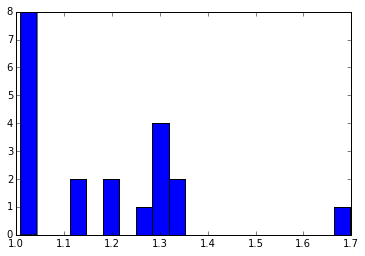

In [200]:
preds = [tree.predict([X])[0] for tree in reg.estimators_]
plt.hist(preds, bins=20)
print "true value:", df.log_cost[sorted_index]
print "predicted value: ", df.pred_log_cost[sorted_index]
print "mean prediction:", np.mean(preds)
print "std prediction:", np.std(preds)
print "median prediction:", np.median(preds)
list(sorted(preds))

In [165]:
# Error by supplier:
tmp = df[['supplier', 'err2']]
supplier_errs = {}
for supplier, indices in tmp.groupby('supplier').groups.iteritems():
    supplier_errs[supplier] = tmp.err2[indices].values

tmp2 = pd.DataFrame(tmp.supplier.value_counts(), columns=['test_count'])
tmp2['train_count'] = aug_train_set.supplier.value_counts()
tmp2['avg_err'] = [np.mean(supplier_errs[s]) for s in tmp2.index]
tmp2['std_err'] = [np.std(supplier_errs[s]) for s in tmp2.index]

tmp2

,test_count,train_count,avg_err,std_err
S-0066,1963,20553,0.052389,0.231572
S-0041,331,3323,0.035265,0.100797
S-0072,235,2317,0.103101,0.281039
S-0054,89,838,0.186193,0.540001
S-0026,66,727,0.327643,0.423543
S-0013,56,554,0.116684,0.236197
S-0058,52,516,0.276922,0.905321
S-0064,49,446,0.191596,0.323623
S-0062,23,264,0.200803,0.210129
S-0014,16,139,0.107703,0.121820


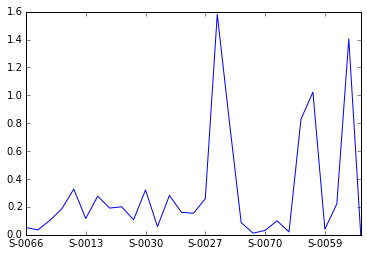

In [163]:
tmp2.avg_err.plot()

In [189]:
# Error by bracketing_pattern:
tmp = df[['bracketing_pattern', 'err2']]
supplier_errs = {}
for supplier, indices in tmp.groupby('bracketing_pattern').groups.iteritems():
    supplier_errs[supplier] = tmp.err2[indices].values

tmp2 = pd.DataFrame(tmp.bracketing_pattern.value_counts(), columns=['test_count'])
tmp2['train_count'] = aug_train_set.bracketing_pattern.value_counts()
tmp2['avg_err'] = [np.mean(supplier_errs[s]) for s in tmp2.index]
tmp2['std_err'] = [np.std(supplier_errs[s]) for s in tmp2.index]

tmp2

,test_count,train_count,avg_err,std_err
"(1, 2, 5, 10, 25, 50, 100, 250)",1648,17640,0.022776,0.174391
(),493,4742,0.228562,0.511073
"(1, 6, 20)",210,2022,0.019721,0.079115
"(1, 2, 3, 5, 10, 20)",54,516,0.029540,0.046008
"(1, 2, 5, 10, 25, 50)",30,186,0.006778,0.017881
"(1, 3, 5, 7, 9)",30,175,0.099165,0.152343
"(5, 19, 20)",30,330,0.000445,0.001012
"(1, 2, 3, 4)",20,120,0.104339,0.173503
"(5, 10, 15, 20)",20,136,0.072327,0.101721
"(1, 3, 5, 10, 20, 30)",18,60,0.256981,0.387375


(-1, 10)

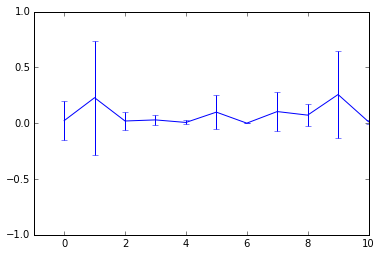

In [195]:
xs = np.arange(len(tmp2))
ys = tmp2.avg_err.values
ybars = tmp2.std_err.values
plt.errorbar(xs, ys, yerr=ybars)
plt.ylim(-1, 1)
plt.xlim(-1, 10)

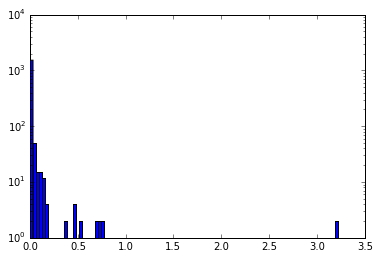

In [198]:
brapa = (1, 2, 5, 10, 25, 50, 100, 250)
hist(supplier_errs[brapa], bins=100, log=True);

In [181]:
X_actual_test_feats = featurizer.transform(aug_test_set)

In [184]:
col_name = 'components other'
print "train:"
print X_train_feats[col_name].value_counts()
print X_train_feats[col_name].value_counts(normalize=True)
print
print "test:"
print X_test_feats[col_name].value_counts()
print X_test_feats[col_name].value_counts(normalize=True)
print
print "actual test:"
print X_actual_test_feats[col_name].value_counts()
print X_actual_test_feats[col_name].value_counts(normalize=True)

train:
0     25543
1      1164
2       379
3       102
4        43
5        17
6        12
9         4
8         3
13        1
11        1
10        1
dtype: int64
0     0.936670
1     0.042684
2     0.013898
3     0.003740
4     0.001577
5     0.000623
6     0.000440
9     0.000147
8     0.000110
13    0.000037
11    0.000037
10    0.000037
dtype: float64

test:
0    2662
1     213
2      57
4       6
3       4
7       1
dtype: int64
0    0.904519
1    0.072375
2    0.019368
4    0.002039
3    0.001359
7    0.000340
dtype: float64

actual test:
0     27784
1      1689
2       549
3        85
4        74
5        31
6        11
8         6
9         4
11        1
7         1
dtype: int64
0     0.918935
1     0.055862
2     0.018158
3     0.002811
4     0.002447
5     0.001025
6     0.000364
8     0.000198
9     0.000132
11    0.000033
7     0.000033
dtype: float64
